# Customer Segmentation Analysis

This notebook provides a comprehensive analysis of customer segmentation. The objective is to identify distinct customer groups using clustering techniques and derive actionable business insights.

## Step 1: Load the Data
**Objective**: Load the dataset and inspect its structure to understand the data.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the data
data = pd.read_csv('../Data/customer_segment_data.csv')
data.head()

,Customer_ID,Age,Gender,Occupation,Income_Bracket,Family_Size,Marital_Status,Education_Level,Region,Monthly_Revenue,...,Last_Interaction_Days,Number_of_Complaints,Payment_Method,Bill_Payment_Timeliness,Outstanding_Balance,Loyalty_Points,Campaign_Responses,Social_Media_Activity,Network_Complaints,Service_Downtime_Impact
0,CUST_00001,57,Male,Unemployed,$50K–$100K,5,Single,Master’s,East,859.647585,...,256,7,Debit Card,Late by >5 Days,298.682790,235,6,Low,1,High
1,CUST_00002,28,Male,Unemployed,>$100K,2,Married,Master’s,East,809.123187,...,200,4,Net Banking,On Time,472.934706,949,5,High,1,High
2,CUST_00003,18,Male,Professional,>$100K,4,Divorced,Bachelor’s,South,396.290281,...,324,6,UPI,Late by >5 Days,184.214510,296,2,High,8,High
3,CUST_00004,60,Male,Unemployed,<$50K,1,Divorced,High School,East,228.122548,...,216,6,Credit Card,On Time,393.592545,15,2,High,7,Medium
4,CUST_00005,25,Male,Student,<$50K,2,Divorced,Master’s,North,904.145976,...,115,9,Debit Card,Late by >5 Days,45.489246,513,9,High,4,High


## Step 2: Select Features for Segmentation
**Objective**: Choose features that are relevant for identifying customer segments. These include behavioral, financial, and demographic features.

In [4]:

# Selecting relevant features for segmentation
features = data[['Age', 'Monthly_Revenue', 'CLTV', 'Avg_Monthly_Data_Usage_GB', 'Feedback_Score']]
features.head()


,Age,Monthly_Revenue,CLTV,Avg_Monthly_Data_Usage_GB,Feedback_Score
0,57,859.647585,15149.298041,198.474073,1
1,28,809.123187,18789.419862,26.002008,9
2,18,396.290281,5025.969576,70.278203,5
3,60,228.122548,10921.510114,58.657036,1
4,25,904.145976,14652.958625,69.178896,4


## Step 3: Preprocess the Data
**Objective**: Standardize the features to ensure they are on the same scale, which is essential for clustering algorithms.

In [5]:

# Standardizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Display standardized data
pd.DataFrame(scaled_features, columns=features.columns).head()


,Age,Monthly_Revenue,CLTV,Avg_Monthly_Data_Usage_GB,Feedback_Score
0,1.182552,1.207215,0.837506,1.670672,-1.621009
1,-1.050131,1.021201,1.492716,-1.279775,1.211685
2,-1.820022,-0.498711,-0.984660,-0.522350,-0.204662
3,1.413519,-1.117848,0.076518,-0.721151,-1.621009
4,-1.281098,1.371043,0.748166,-0.541156,-0.558749


## Step 4: Determine the Optimal Number of Clusters
**Objective**: Use the Elbow Method to identify the optimal number of clusters for segmentation.

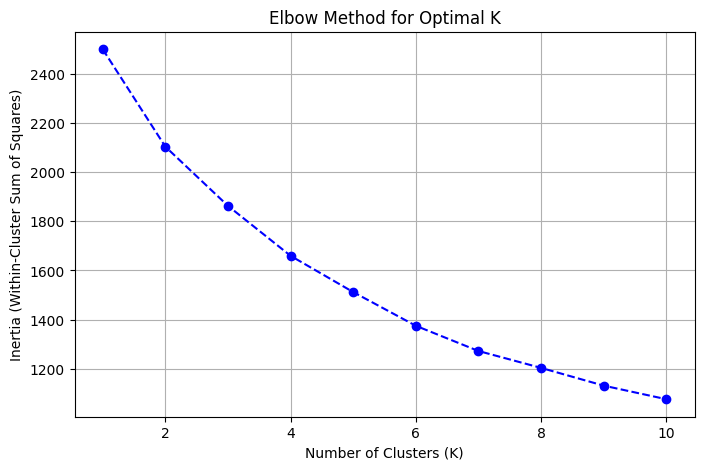

In [6]:

# Elbow Method to determine optimal number of clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()


## Step 5: Apply KMeans Clustering
**Objective**: Cluster customers into groups using the optimal number of clusters identified.

In [7]:

# Apply KMeans with optimal K (assume K=3 from the Elbow curve)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Segment'] = kmeans.fit_predict(scaled_features)

# Map clusters to readable labels
segment_labels = {0: 'High-Value', 1: 'Mid-Value', 2: 'Low-Value'}
data['Segment'] = data['Segment'].map(segment_labels)
data[['Customer_ID', 'Segment']].head()


,Customer_ID,Segment
0,CUST_00001,Low-Value
1,CUST_00002,Mid-Value
2,CUST_00003,Mid-Value
3,CUST_00004,High-Value
4,CUST_00005,Mid-Value


## Step 6: Analyze Segments
**Objective**: Explore the characteristics of each customer segment to understand their behavior and value.

## Step 7: Visualize Customer Segments
**Objective**: Use visualizations to understand the size and characteristics of each segment.

C:\Users\Rahul\AppData\Local\Temp\ipykernel_34284\2322427399.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Segment', order=['Low-Value', 'Mid-Value', 'High-Value'], palette='Set2')


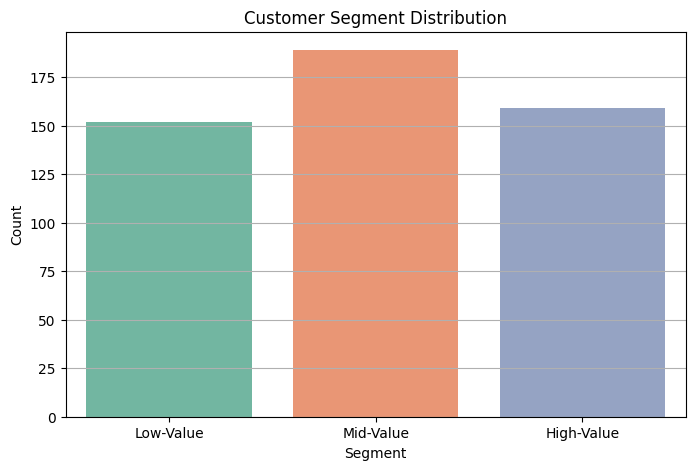

In [8]:

# Visualize segment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Segment', order=['Low-Value', 'Mid-Value', 'High-Value'], palette='Set2')
plt.title('Customer Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


In [20]:
data.groupby('Segment').agg({
    'Monthly_Revenue': 'mean',
    'CLTV':'mean'
})

,Monthly_Revenue,CLTV
Segment,,
High-Value,755.085154,14585.601194
Low-Value,280.302803,13856.064987
Mid-Value,526.177778,5280.068331


C:\Users\Rahul\AppData\Local\Temp\ipykernel_34284\3532215570.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Segment', y='Monthly_Revenue', order=['Low-Value', 'Mid-Value', 'High-Value'], palette='cool')


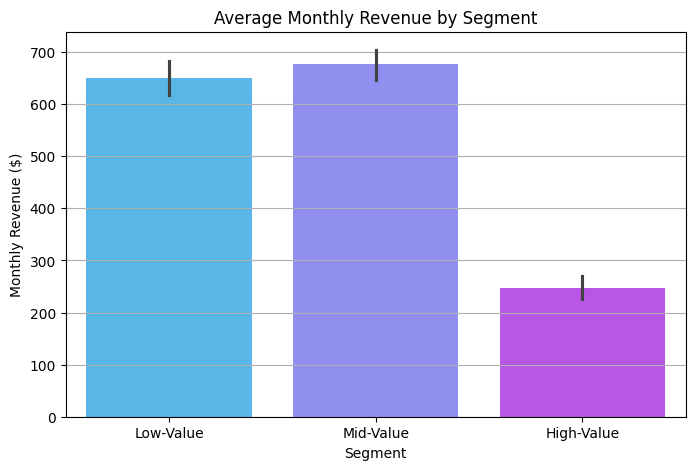

C:\Users\Rahul\AppData\Local\Temp\ipykernel_34284\3532215570.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Segment', y='CLTV', order=['Low-Value', 'Mid-Value', 'High-Value'], palette='coolwarm')


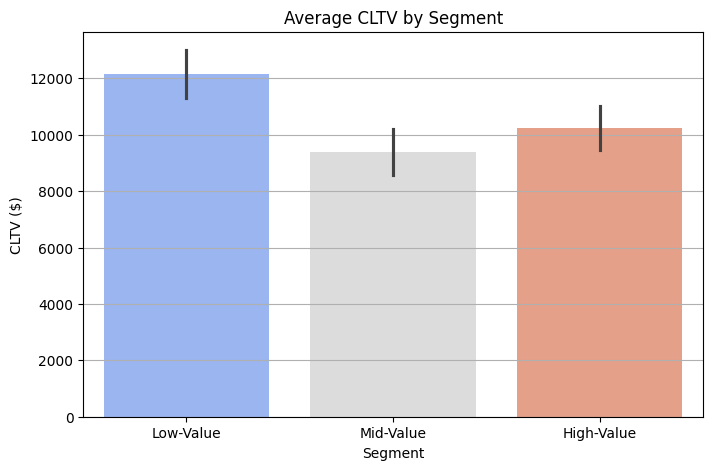

In [9]:

# Revenue and CLTV comparison by segment
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='Segment', y='Monthly_Revenue', order=['Low-Value', 'Mid-Value', 'High-Value'], palette='cool')
plt.title('Average Monthly Revenue by Segment')
plt.xlabel('Segment')
plt.ylabel('Monthly Revenue ($)')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='Segment', y='CLTV', order=['Low-Value', 'Mid-Value', 'High-Value'], palette='coolwarm')
plt.title('Average CLTV by Segment')
plt.xlabel('Segment')
plt.ylabel('CLTV ($)')
plt.grid(axis='y')
plt.show()


## Step 8: Recommendations

### Insights:
1. **High-Value Customers**: These customers generate the highest revenue and have the highest CLTV. Focus on retaining them with loyalty programs, premium services, and personalized offers.
2. **Mid-Value Customers**: Stable contributors with potential to move into the high-value segment. Encourage spending through targeted campaigns and value-add services.
3. **Low-Value Customers**: These customers contribute the least but may represent an untapped market. Use cost-effective strategies to improve engagement or upsell basic plans.

### Actions:
- Design marketing strategies and offers tailored to each segment.
- Use segment characteristics to prioritize business goals (e.g., retention, upselling, or cost-cutting).
